# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
#Loading data from a CSV file
df = pd.read_csv('/kaggle/input/stock-price-prediction-of-apple-inc/apple_share_price.csv')

In [3]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,11-Aug-17,156.60,158.57,156.07,157.48,26257096
1,10-Aug-17,159.90,160.00,154.63,155.32,40804273
2,9-Aug-17,159.26,161.27,159.11,161.06,26131530
3,8-Aug-17,158.60,161.83,158.27,160.08,36205896
4,7-Aug-17,157.06,158.92,156.67,158.81,21870321


In [5]:
df.shape

(1664, 6)

**df.reset_index(): This method is used to reset the index of a DataFrame. When you reset the index, the current index becomes a new column, and a default integer index is assigned to the DataFrame. This operation is often used to move the existing index (possibly a datetime index) to a regular column.**

 **['Close']: After resetting the index, the code selects the 'Close' column from the resulting DataFrame. This is done by using the square brackets (['Close']) to access the column with the label 'Close'.**

In [8]:
df1=df.reset_index()['Close'];df1

0       157.48
1       155.32
2       161.06
3       160.08
4       158.81
         ...  
1659     48.02
1660     47.68
1661     47.71
1662     47.33
1663     47.08
Name: Close, Length: 1664, dtype: float64

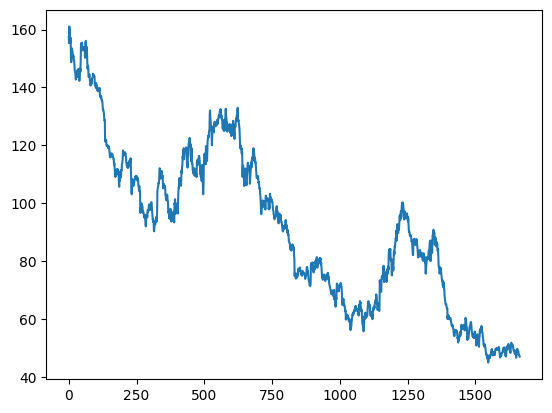

In [9]:
plt.plot(df1)

# Normalize Data

**Normalize the data to ensure that all features have the same scale. This is important for the LSTM to learn effectively.**

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(np.array(df['Close']).reshape(-1, 1))


# Create Sequences for LSTM

**Create input sequences for the LSTM model. This involves defining a window of past data that the model will use for prediction.**

In [11]:
def create_sequences(data,seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences)

seq_length = 10  # Adjust as needed
X = create_sequences(df['Close'], seq_length)

# Split Data into Training and Testing Sets:

In [12]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
train, test = X[0:train_size], X[train_size:len(X)]

# Model

In [13]:
from tensorflow.keras.layers import Dropout

model = Sequential()

# Add the first LSTM layer with return_sequences=True
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))  # Add dropout for regularization

# Add a second LSTM layer with return_sequences=True
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Add a third LSTM layer with return_sequences=True
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Add a fourth LSTM layer without return_sequences (default is False)
model.add(LSTM(units=100))
model.add(Dropout(0.2))

# Add a Dense layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


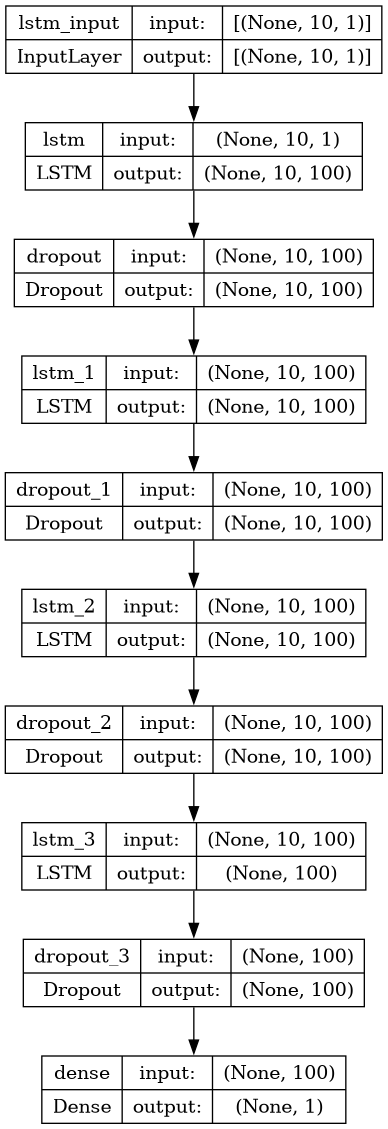

In [32]:
# LSTM Model Architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)


In [14]:
target_data = df['Close'][seq_length:seq_length+train_size]
model.fit(train, target_data, epochs=10, batch_size=32)


Epoch 1/10
42/42 [==============================] - 10s 34ms/step - loss: 0.0291
Epoch 2/10
42/42 [==============================] - 1s 36ms/step - loss: 0.0032
Epoch 3/10
42/42 [==============================] - 2s 40ms/step - loss: 0.0038
Epoch 4/10
42/42 [==============================] - 2s 39ms/step - loss: 0.0023
Epoch 5/10
42/42 [==============================] - 1s 35ms/step - loss: 0.0024
Epoch 6/10
42/42 [==============================] - 1s 35ms/step - loss: 0.0028
Epoch 7/10
42/42 [==============================] - 1s 34ms/step - loss: 0.0021
Epoch 8/10
42/42 [==============================] - 1s 33ms/step - loss: 0.0022
Epoch 9/10
42/42 [==============================] - 1s 33ms/step - loss: 0.0024
Epoch 10/10
42/42 [==============================] - 1s 34ms/step - loss: 0.0022


In [19]:
target_data = df['Close'][seq_length:seq_length+train_size]
historyy = model.fit(train, target_data, epochs=10, batch_size=32,validation_split=0.2)


Epoch 1/10
34/34 [==============================] - 3s 89ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 2/10
34/34 [==============================] - 1s 39ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 3/10
34/34 [==============================] - 1s 38ms/step - loss: 0.0022 - val_loss: 9.2403e-04
Epoch 4/10
34/34 [==============================] - 1s 39ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 5/10
34/34 [==============================] - 1s 39ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 6/10
34/34 [==============================] - 1s 41ms/step - loss: 0.0023 - val_loss: 8.4886e-04
Epoch 7/10
34/34 [==============================] - 1s 38ms/step - loss: 0.0026 - val_loss: 8.7027e-04
Epoch 8/10
34/34 [==============================] - 1s 37ms/step - loss: 0.0023 - val_loss: 9.0684e-04
Epoch 9/10
34/34 [==============================] - 1s 37ms/step - loss: 0.0018 - val_loss: 9.8814e-04
Epoch 10/10
34/34 [==============================] - 1s 38ms/step - loss: 0.0022 - val_lo

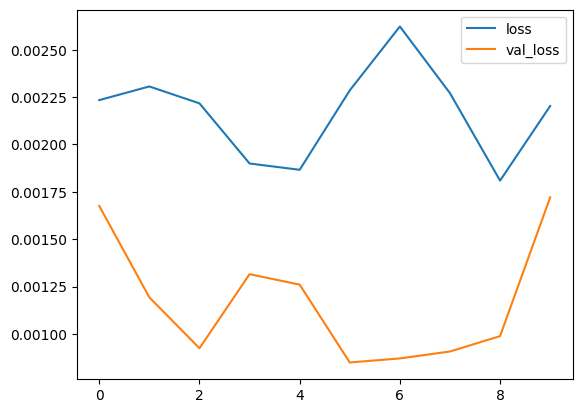

In [20]:
history_df = pd.DataFrame(historyy.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [21]:
# Make Predictions
predictions = model.predict(test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 2s 9ms/step


# Plot Results

/tmp/ipykernel_469/522608240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


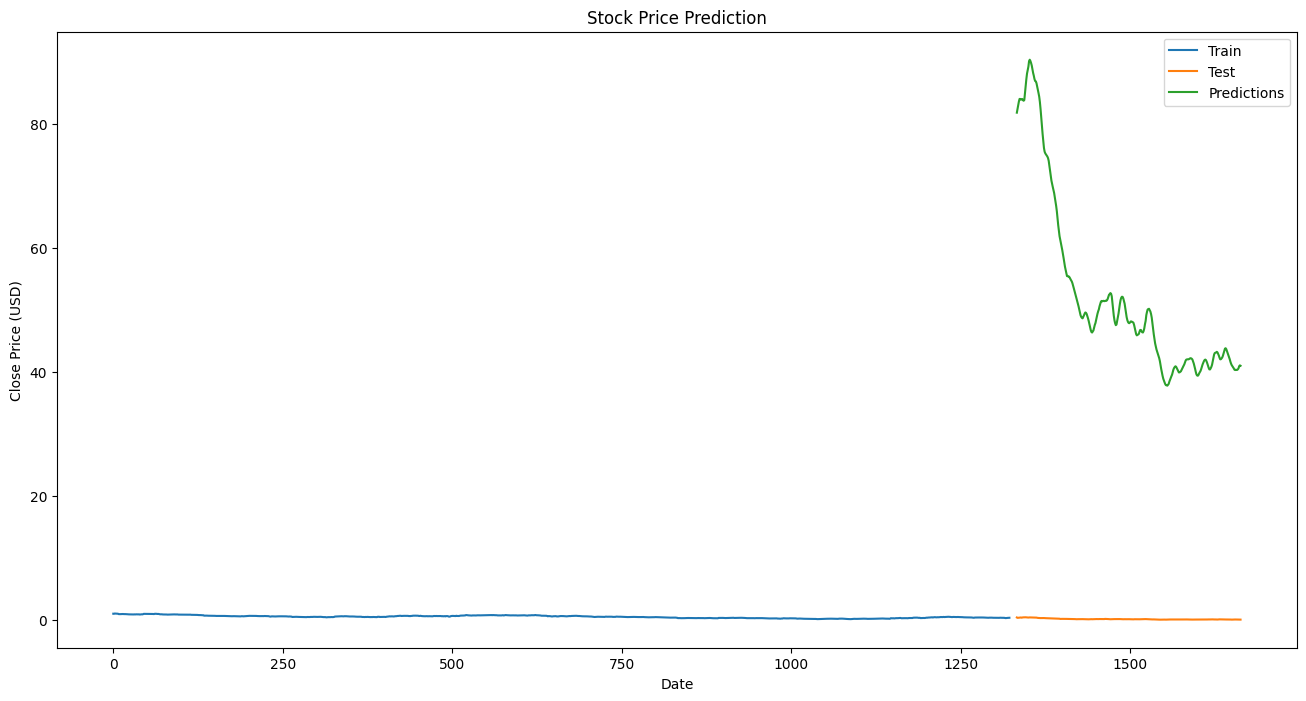

In [22]:
train = df.iloc[:train_size, :]
test = df.iloc[train_size+seq_length:, :]

test['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()

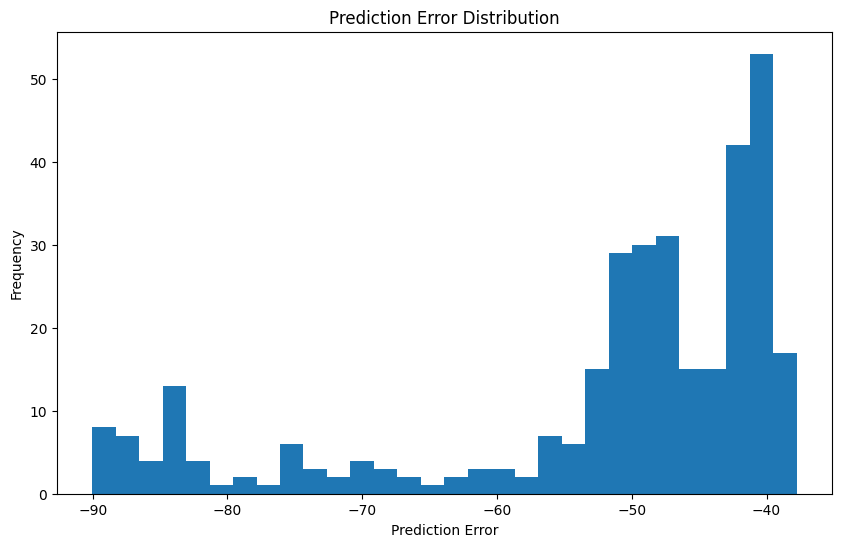

In [30]:
#Prediction Error Distribution
error = test['Close'] - test['Predictions']
plt.figure(figsize=(10,6))
plt.hist(error, bins=30)
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


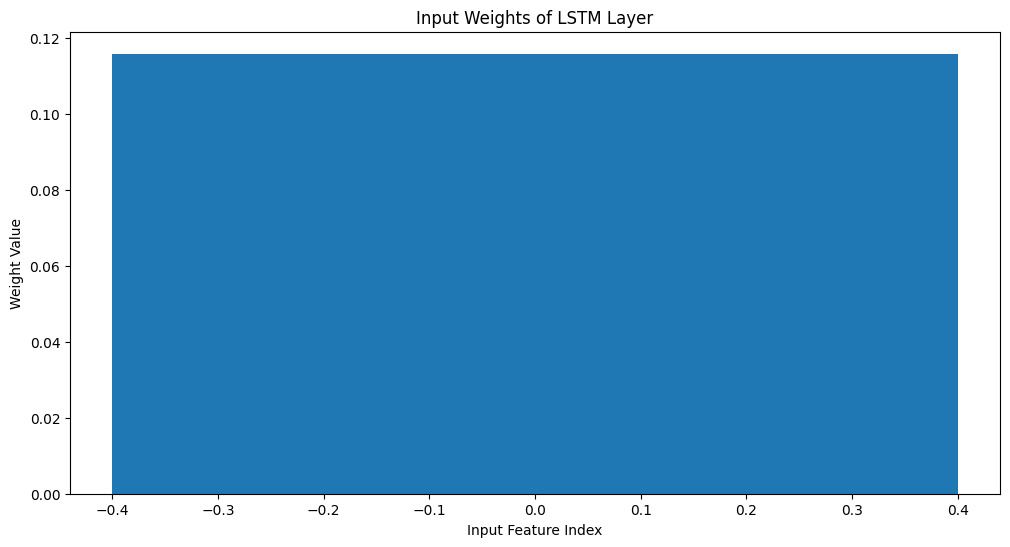

In [33]:
# Feature Importance (Input Weights)
weights = model.layers[0].get_weights()[0]
plt.figure(figsize=(12,6))
plt.bar(range(len(weights)), weights[:, 0])
plt.title('Input Weights of LSTM Layer')
plt.xlabel('Input Feature Index')
plt.ylabel('Weight Value')
plt.show()


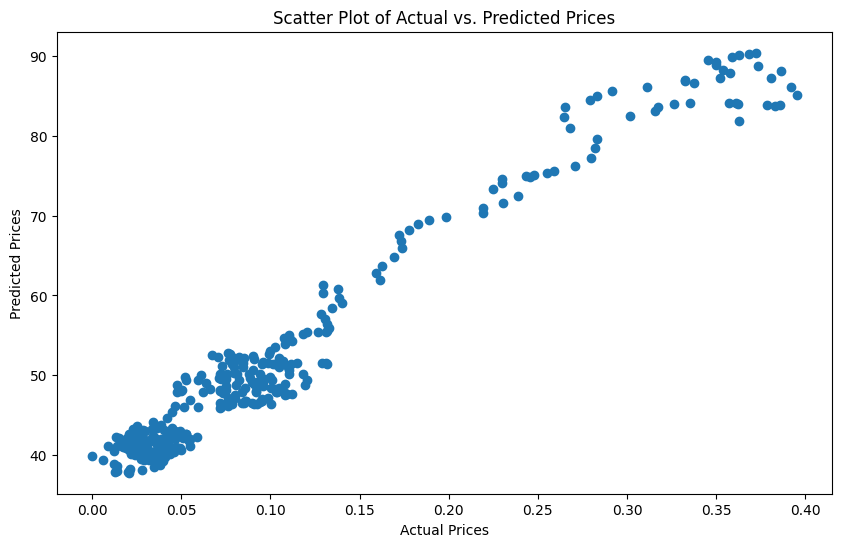

In [39]:
#Scatter Plot of Actual vs. Predicted Prices
plt.figure(figsize=(10,6))
plt.scatter(test['Close'], test['Predictions'])
plt.title('Scatter Plot of Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


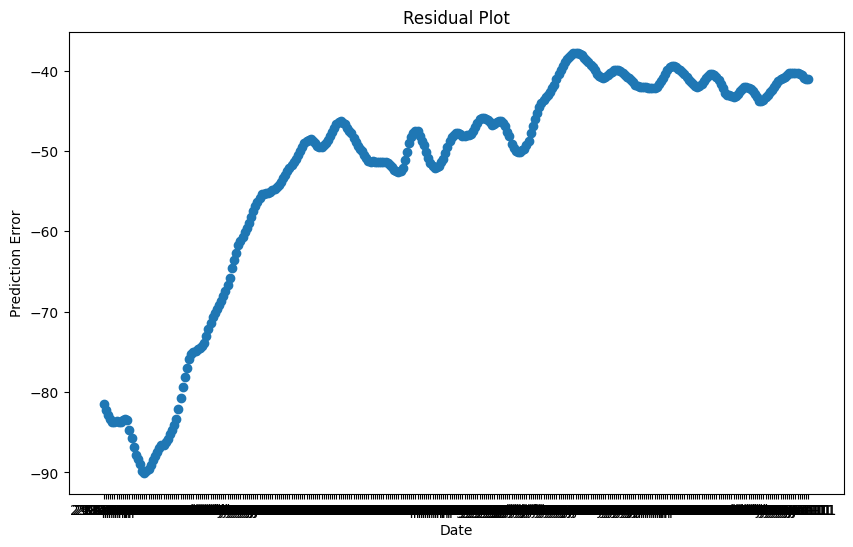

In [40]:
# Residual Plot
plt.figure(figsize=(10,6))
plt.scatter(test['Date'], error)
plt.title('Residual Plot')
plt.xlabel('Date')
plt.ylabel('Prediction Error')
plt.show()


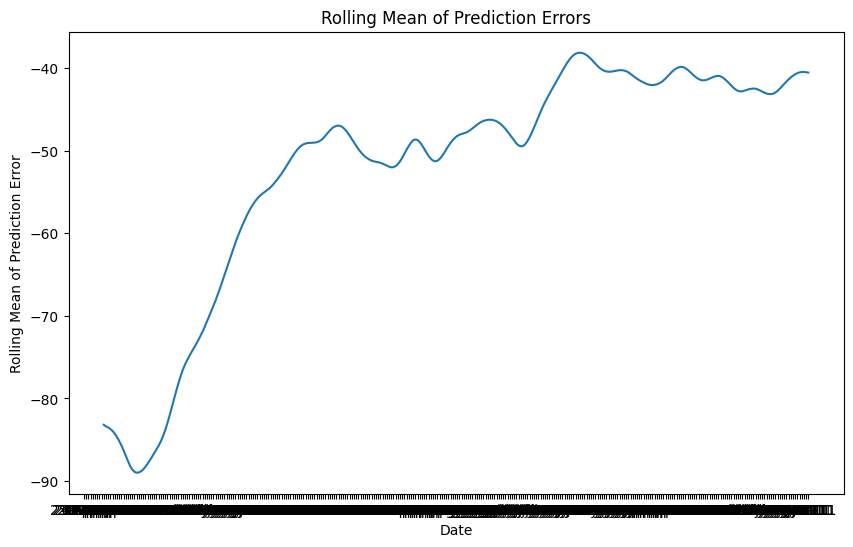

In [42]:
# Rolling Mean of Prediction Errors
rolling_mean = error.rolling(window=10).mean()
plt.figure(figsize=(10,6))
plt.plot(test['Date'], rolling_mean)
plt.title('Rolling Mean of Prediction Errors')
plt.xlabel('Date')
plt.ylabel('Rolling Mean of Prediction Error')
plt.show()


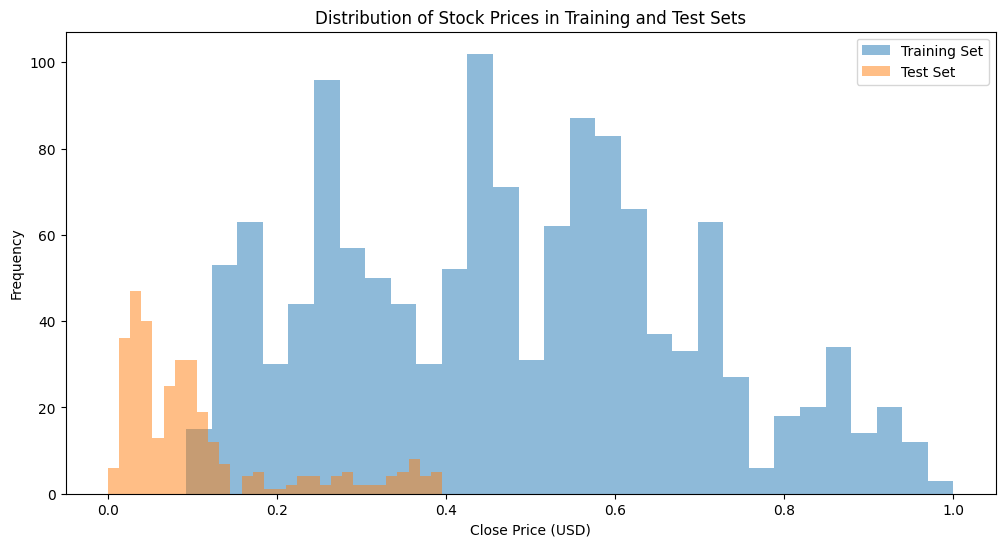

In [45]:
# Distribution of Training and Test Sets
plt.figure(figsize=(12,6))
plt.hist(train['Close'], bins=30, alpha=0.5, label='Training Set')
plt.hist(test['Close'], bins=30, alpha=0.5, label='Test Set')
plt.title('Distribution of Stock Prices in Training and Test Sets')
plt.xlabel('Close Price (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# THANK YOU